<a href="https://colab.research.google.com/github/ALuchinsky/mac-tdavec/blob/main/tutorials/basic/Basic%201%20-%20HNX%20Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install hypernetx ## uncomment to run in Colab


In [2]:
import hypernetx as hnx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.simplefilter('ignore')

# Construct and visualize your first HNX hypergraphs

##  The Hypergraph constructor

`hnx.Hypergraph` accepts multiple types of setsystems to create a hypergraph:

- lists of lists,
- dictionaries,
- nested dictionaries,
- numpy arrays
- pandas DataFrames.

**Note:** The data in several of our notebooks are taken from the jean.dat dataset available from the Stanford GraphBase at https://www-cs-faculty.stanford.edu/~knuth/sgb.html. For example, the scenes data gives character scene incidence information from the novel Les Mis&eacuterables by Victor Hugo.

### List of Lists

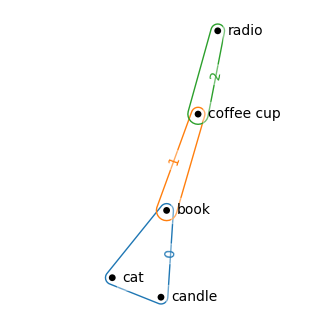

In [3]:
list_of_lists = [['book','candle','cat'],['book','coffee cup'],['coffee cup','radio']]

H = hnx.Hypergraph(list_of_lists)

plt.subplots(figsize=(4,4))
hnx.draw(H)

### Dictionary

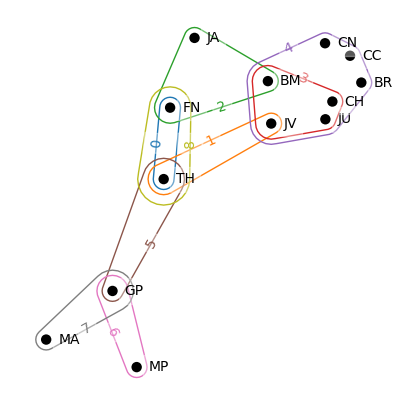

In [4]:
scenes_dictionary = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP'),
    8: ('FN', 'TH')
}

H = hnx.Hypergraph(scenes_dictionary)

## HNX has a built in draw function - more information may be found in tutorial Basic 2
plt.subplots(figsize=(5,5))
hnx.draw(H)

### Nested Dictionary (adding metadata to incidences)

In [5]:
## nested dictionaries allow you to associate data with the relationships

nested_dictionary =  {
    0: {'FN':{'time':'early', 'weight': 7}, 'TH':{'time':'late'}},
    1: {'TH':{'subject':'war'}, 'JV':{'observed_by':'someone'}},
    2: {'BM':{}, 'FN':{}, 'JA':{'role':'policeman'}},
    3: {'JV':{'was_carrying':'stick'}, 'JU':{}, 'CH':{}, 'BM':{'state':'intoxicated', 'color':'pinkish'}},
    4: {'JU':{'weight':15}, 'CH':{}, 'BR':{'state':'worried'}, 'CN':{}, 'CC':{}, 'JV':{}, 'BM':{}},
    5: {'TH':{}, 'GP':{}},
    6: {'GP':{}, 'MP':{}},
    7: {'MA':{}, 'GP':{'accompanied_by':'dog', 'weight':15, 'was_singing': 'Frère Jacques'}}
}

H = hnx.Hypergraph(nested_dictionary)

## The data associated with each incidence may be viewed from the hypergraph's dataframe
H.dataframe

,edges,nodes,weight,misc_properties
0,0,FN,7,{'time': 'early'}
1,0,TH,1,{'time': 'late'}
2,1,TH,1,{'subject': 'war'}
3,1,JV,1,{'observed_by': 'someone'}
4,2,BM,1,{}
5,2,FN,1,{}
6,2,JA,1,{'role': 'policeman'}
7,3,JV,1,{'was_carrying': 'stick'}
8,3,JU,1,{}
9,3,CH,1,{}


### Numpy Arrays

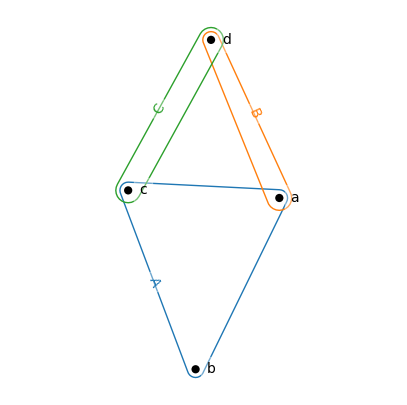

In [6]:
## Numpy arrays must have shape (N,2) where N = the number of desired incidences.
np_array = np.array([['A','a'],['A','b'],['A','c'],['B','a'],['B','d'],['C','c'],['C','d']])

H = hnx.Hypergraph(np_array)

plt.subplots(figsize=(5,5))
hnx.draw(H)

### Pandas DataFrames

In [7]:
## Data for large hypergraphs are often stored in a csv file
## These can be read into a Pandas DataFrame for insertion into an HNX hypergraph
filepath = '../data/dogsAndcats.csv'

## uncomment the filepath below to run in Colab
# filepath = 'https://raw.githubusercontent.com/pnnl/HyperNetX/master/tutorials/data/dogsAndcats.csv'

df = pd.read_csv(filepath)
df

FileNotFoundError: [Errno 2] No such file or directory: '../data/dogsAndcats.csv'

     edges   nodes  weight misc_properties
0     Togo   Amber     1.0              {}
1     Togo  George     5.0              {}
2    Balto    Bill     1.0              {}
3    Balto    Fred     5.0              {}
4      Tux   Daisy     5.0              {}
5      Tux    Fred     5.0              {}
6      Tux   Henry     5.0              {}
7    Buddy    Bill     5.0              {}
8   Bandit    Cozy     1.0              {}
9   Bandit   Amber     1.0              {}
10  Bandit    Fred     1.0              {}
11  Bandit    Bill     1.0              {}
12   Black   Daisy     1.0              {}
13   Black    Fred     1.0              {}
14   Black   Henry     8.0              {}
15    Togo    Cozy    12.0              {}
16    Rosa    Zuko     1.0              {}


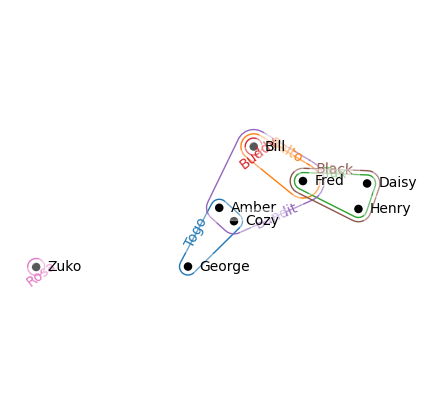

In [ ]:
## The first two columns are treated as edges and nodes by default (this my be changed in the constructor)
## and the 'weight' column is treated as weights for the incidences
## misc_properties can be user defined or generated by HNX for storing properties unique to individual
## incidences

H = hnx.Hypergraph(df)

print(H.dataframe)
plt.subplots(figsize=(5,5))
hnx.draw(H)


## Additional Constructors

In addition HNX has constructors for

- NetworkX bipartite graphs
- Incidence Dataframes
- Incidence Matrices


### Bipartite Graphs

In [8]:
B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(['a', 'b', 'c'], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, 'a'), (1, 'b'),(2, 'a'), (2, 'b'), (2, 'c'), (3, 'c'), (4, 'a')])

HB = hnx.Hypergraph.from_bipartite(B)


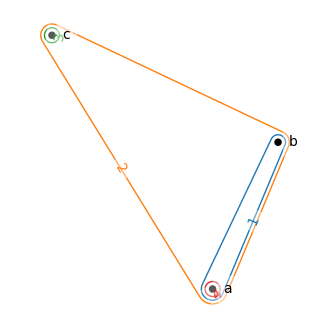

In [9]:
plt.subplots(figsize=(4,4))
hnx.draw(HB)

### Incidence Dataframes

In [10]:
filepath = '../data/incidence_dataframe.csv'

## uncomment the filepath below to run in Colab
# filepath = 'https://raw.githubusercontent.com/pnnl/HyperNetX/master/tutorials/data/incidence_dataframe.csv'

df = pd.read_csv(filepath,index_col='index')
df

FileNotFoundError: [Errno 2] No such file or directory: '../data/incidence_dataframe.csv'

  edges nodes  weight misc_properties
0     A     a     5.0              {}
1     A     b     1.0              {}
2     B     b     3.0              {}
3     A     c     1.0              {}
4     C     c     0.4              {}
5     B     d     1.0              {}
6     C     d     1.0              {}
7     D     d     1.0              {}


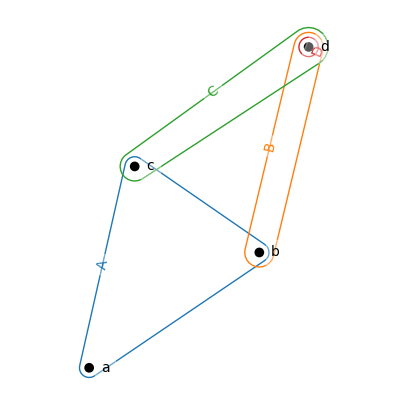

In [ ]:
H = hnx.Hypergraph.from_incidence_dataframe(df)

print(H.dataframe)
plt.subplots(figsize=(5,5))
hnx.draw(H)

### Incidence Matrix

In [11]:
M = df.values #from the last example
M

NameError: name 'df' is not defined

   edges  nodes  weight misc_properties
0      0      0     5.0              {}
1      0      1     1.0              {}
2      1      1     3.0              {}
3      0      2     1.0              {}
4      2      2     0.4              {}
5      1      3     1.0              {}
6      2      3     1.0              {}
7      3      3     1.0              {}


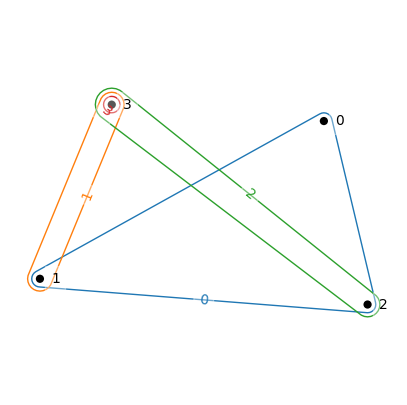

In [ ]:
## Names of edges and nodes correspond to index of columns(edges) and rows(nodes)
H = hnx.Hypergraph.from_incidence_matrix(M)

print(H.dataframe)
plt.subplots(figsize=(5,5))
hnx.draw(H)

# HNX Hypergraph methods

In [12]:
scenes_dictionary = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP'),
    8: ('FN', 'TH')
}

H = hnx.Hypergraph(scenes_dictionary)

## Dual Hypergraphs

All hypergraphs have a natural dual structure where the edges and nodes switch roles. Edges become nodes and nodes become edges. This can be constructed by calling the `dual` method for a given hypergraph.

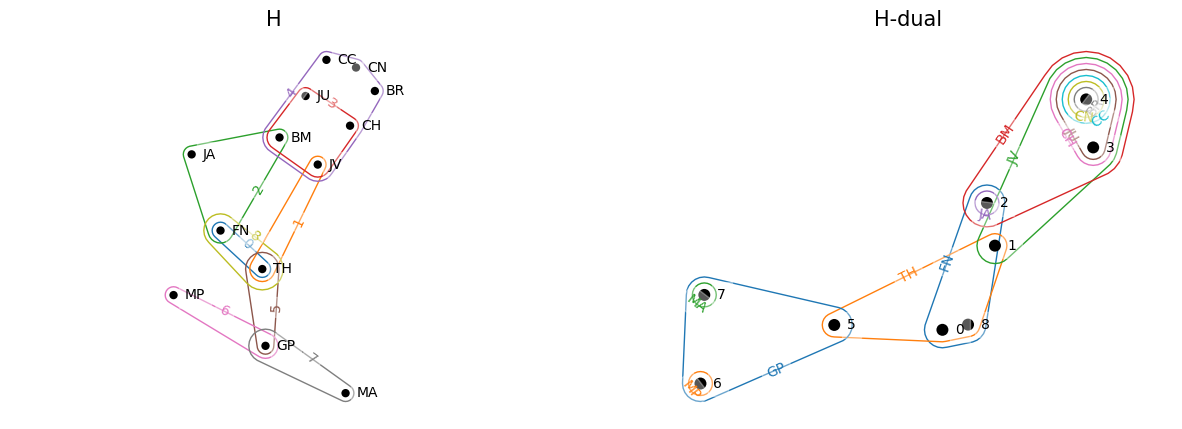

In [13]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
HD = H.dual()
hnx.draw(H,ax=ax[0])
ax[0].set_title("H",fontsize=15)
hnx.draw(HD,ax=ax[1])
ax[1].set_title("H-dual",fontsize=15);

## Access the objects in the hypergraph

In [14]:
# There are 3 hypergraph view objects: Edges, Nodes, Incidences.
H.nodes.items

{'BM', 'BR', 'CC', 'CH', 'CN', 'FN', 'GP', 'JA', 'JU', 'JV', 'MA', 'MP', 'TH'}

In [15]:
H.edges.items

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8)}

In [16]:
# The number of nodes and edges is returned by the shape property
H.incidences.items

{(0, 'FN'),
 (0, 'TH'),
 (1, 'JV'),
 (1, 'TH'),
 (2, 'BM'),
 (2, 'FN'),
 (2, 'JA'),
 (3, 'BM'),
 (3, 'CH'),
 (3, 'JU'),
 (3, 'JV'),
 (4, 'BM'),
 (4, 'BR'),
 (4, 'CC'),
 (4, 'CH'),
 (4, 'CN'),
 (4, 'JU'),
 (4, 'JV'),
 (5, 'GP'),
 (5, 'TH'),
 (6, 'GP'),
 (6, 'MP'),
 (7, 'GP'),
 (7, 'MA'),
 (8, 'FN'),
 (8, 'TH')}

In [17]:
## basic information about the hypergraph

hnx.info_dict(H)

{'nrows': 13,
 'ncols': 9,
 'aspect ratio': 1.4444444444444444,
 'ncells': 26,
 'density': 0.2222222222222222}

In [18]:
H.shape

(13, 9)

The degree of a node is the number of edges it is contained within. The optional `s` parameter places a restriction on the size of the edges you consider (default `s=1`). The degree function looks for all edges of size $\geq s$.

Note: `H.s_degree(node)` is a wrapper for the degree method and returns the same thing.

In [19]:
H.degree('JV', s=1)

3

The `dim` (dimension) and `size` methods return information about an edge. The size is the number of nodes contained in an edge and the dimension is one less than the size. The dimension is so named because if we consider a hypergraph as a [simplicial complex](https://en.wikipedia.org/wiki/Simplicial_complex), then each edge is a simplex. The dimension of a simplex is one less than its number of nodes.

In [20]:
H.dim(3), H.size(3)

(3, 4)

The `neighbors` method for hypergraphs works similarly as for networkx graphs. It returns an iterator that goes through all nodes which share s edges with the given node. By default s=1.

In [21]:
list(H.neighbors('JV'))

['BM', 'BR', 'CC', 'CH', 'CN', 'JU', 'TH']

`edge_neighbors` returns the same thing on the dual

In [22]:
list(H.edge_neighbors(1))

[np.int64(0), np.int64(3), np.int64(4), np.int64(5), np.int64(8)]

# Hypergraph representations
There are different ways to represent the data contained within the hypergraph. `H.incidence_dict` returns a dictionary whereas `H.incidence_matrix()` returns a scipy sparse matrix in Compressed Sparse Row format. `H.incidence_dataframe()` places the matrix in a dataframe and indexed by nodes and edges. `H.bipartite()` returns a networkx bipartite `Graph()` object.

In [23]:
H.incidence_dict

{0: ['FN', 'TH'],
 1: ['TH', 'JV'],
 2: ['BM', 'FN', 'JA'],
 3: ['JV', 'JU', 'CH', 'BM'],
 4: ['JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'],
 5: ['TH', 'GP'],
 6: ['GP', 'MP'],
 7: ['MA', 'GP'],
 8: ['FN', 'TH']}

In [25]:
H.incidence_dataframe()

,0,1,2,3,4,5,6,7,8
BM,0,0,1,1,1,0,0,0,0
BR,0,0,0,0,1,0,0,0,0
CC,0,0,0,0,1,0,0,0,0
CH,0,0,0,1,1,0,0,0,0
CN,0,0,0,0,1,0,0,0,0
FN,1,0,1,0,0,0,0,0,1
GP,0,0,0,0,0,1,1,1,0
JA,0,0,1,0,0,0,0,0,0
JU,0,0,0,1,1,0,0,0,0
JV,0,1,0,1,1,0,0,0,0


In [26]:
M_incidence = H.incidence_matrix()
M_incidence.toarray()

array([[0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 0, 1]])

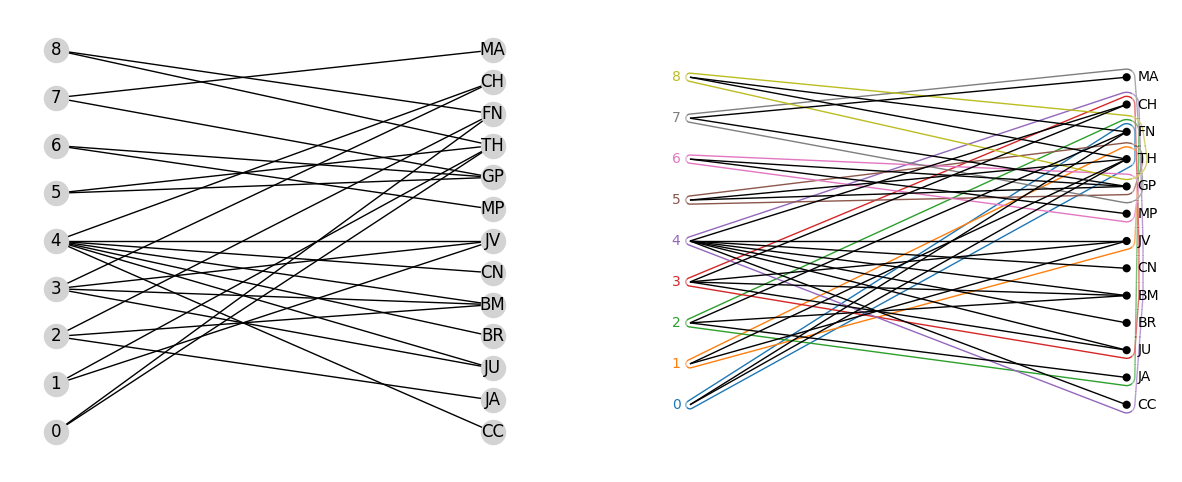

In [27]:
## Networkx and HyperNetX visualizations of the bipartite representation of the hypergraph - note the planarity issues on the right
fig,ax = plt.subplots(1,2,figsize=(15,6))
BH = H.bipartite()
top = nx.bipartite.sets(BH)[0]
pos = nx.bipartite_layout(BH, top)

nx.draw(BH, with_labels=True,pos=pos,ax=ax[0], node_color='lightgrey')

hnx.draw_bipartite_using_euler(H,ax=ax[1],pos=pos)


# Connected components

<img src="https://github.com/pnnl/HyperNetX/blob/master/tutorials/images/s-width.png?raw=1" width="600" align="left" style="margin-right:10px">

Hypergraph metrics generalize traditional graph metrics by including parameters for edge size and edge intersection size, also called the *width* of the intersection. In the figure there are two hypergraphs. Each illustrates an (edge) path of length 2, connecting Blue, Orange, and Green. The path in hypergraph I has *width* 1, while the path in hypergraph II has *width* 3. The width of an edge path is the size of the smallest intersection. An $s$-connected component is one where between any two edges in the component there is a path of width $s$ connecting them.

More details can be found in `/tutorials/advanced/Advanced 5 - s-centrality.ipynb`
To learn more about some of our research in this area,  check out our paper, [Hypernetwork science via high order hypergraph walks](https://epjdatascience.springeropen.com/articles/10.1140/epjds/s13688-020-00231-0)

`s_components` and `s_component_subgraphs` return a generators which iterates through the edge sets and subgraphs for each s-connected component.

In [28]:
print('1-component edge sets:')
for comp in H.s_components(s=1):
    print(comp)

print('\n2-component edge sets:')
for comp in H.s_components(s=2):
    print(comp)


1-component edge sets:
{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)}

2-component edge sets:
{np.int64(0), np.int64(8)}
{np.int64(1)}
{np.int64(2)}
{np.int64(3), np.int64(4)}
{np.int64(5)}
{np.int64(6)}
{np.int64(7)}


`s_component_subgraphs` returns a generator object which iterates through the sub-hypergraph for each s-connected component.  

In [29]:
print('1-component sub-hypergraph incidence dictionaries:')
for comp in H.s_component_subgraphs(s=1):
    print(comp.incidence_dict)

print('\n2-component sub-hypergraph incidence dictionaries:')
for comp in H.s_component_subgraphs(s=2):
    print(comp.incidence_dict)


1-component sub-hypergraph incidence dictionaries:
{0: ['FN', 'TH'], 1: ['TH', 'JV'], 2: ['BM', 'FN', 'JA'], 3: ['JV', 'JU', 'CH', 'BM'], 4: ['JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'], 5: ['TH', 'GP'], 6: ['GP', 'MP'], 7: ['MA', 'GP'], 8: ['FN', 'TH']}

2-component sub-hypergraph incidence dictionaries:
{0: ['FN', 'TH'], 8: ['FN', 'TH']}
{3: ['JV', 'JU', 'CH', 'BM'], 4: ['JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM']}


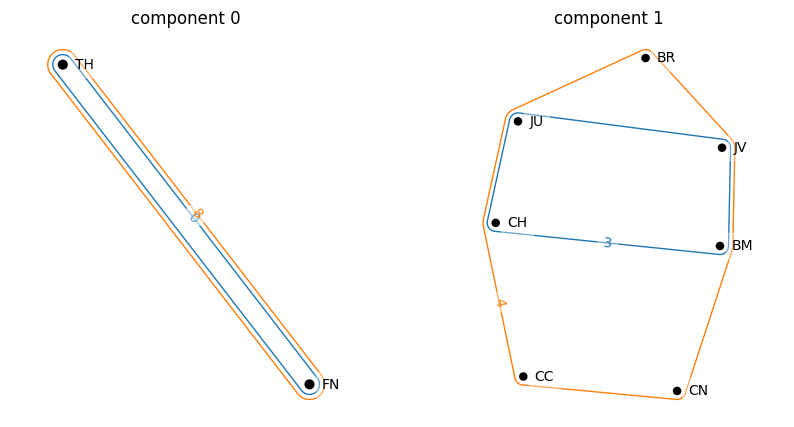

In [30]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
for idx,sh in enumerate(H.s_component_subgraphs(s=2)):
    hnx.draw(sh, ax=ax[idx])
    ax[idx].set_title(f"component {idx}")

The methods `component_subgraphs` and `connected_component_subgraphs` are wrappers for `s_component_subgraphs`. The methods `components` and `connected_components` are wrappers for `s_connected_components`.

The `is_connected` method with optional parameter `s` (default `s=1`) returns `True` or `False` depending on whether the hypergraph is s-connected.

In [ ]:
# The Les Mis example hypergraph is 1-connected but not 2-connected

H.is_connected(s=1), H.is_connected(s=2)

(True, False)

# s-Line Graphs and s-Adjacency matrices

In graphs, two nodes are considered **s-adjacent** if they share s edges. In hypergraphs, two nodes are **s-adjacent** if they are co-incident with at least s hyperedges. Similarly, two hyperedges are considered **s-adjacent** if they  are co-incident with at least s nodes.

An **s-linegraph on the nodes** of a hypergraph is a graph on the nodes of the hypergraph where graph edges connect s-neighbors.
An **s-linegraph on the hyperedges** of a hypergraph is a graph using the hyperedges as nodes where graph edges connect s-adjacent hyperedges.

The corresponding adjacency matrices are the **s-adjacency** and **s-edge adjacency matrices**.
An s-adjacency matrix with the zero rows and columns removed is called an **s-auxiliary matrix**.

**Note**: At present these matrices are unweighted, we will introduce weighting in a near future release.

In [31]:
## the adjacency and auxiliary methods return a matrix and has an optional keyword argument to return an
## index of the row and columns ids

mat, rindex = H.adjacency_matrix(s=2,index=True)
mat.todense(),rindex

(matrix([[0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
         [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]),
 array(['BM', 'BR', 'CC', 'CH', 'CN', 'FN', 'GP', 'JA', 'JU', 'JV', 'MA',
        'MP', 'TH'], dtype=object))

In [ ]:
mat, rindex = H.auxiliary_matrix(s=2,index=True)
mat.todense(),rindex

(matrix([[0, 1, 0, 1, 1, 0],
         [1, 0, 0, 1, 1, 0],
         [0, 0, 0, 0, 0, 1],
         [1, 1, 0, 0, 1, 0],
         [1, 1, 0, 1, 0, 0],
         [0, 0, 1, 0, 0, 0]]),
 array(['BM', 'CH', 'FN', 'JU', 'JV', 'TH'], dtype=object))

In [ ]:
H.auxiliary_matrix(s=2,index=True)

(<6x6 sparse matrix of type '<class 'numpy.int64'>'
 	with 14 stored elements in Compressed Sparse Row format>,
 array(['BM', 'CH', 'FN', 'JU', 'JV', 'TH'], dtype=object))

# Distances and diameters
Just as connected components of graphs can be generalized to s-connected components in hypergraphs, the distance and diameter can be generalized to s-distance and s-diameter in hypergraphs.

We can compute s-distance between edges using `edge_distance` and between nodes using `distance`. See the glossary in the documentation for detailed definitions of distance between edges and between nodes.

Exercise:  

1. What is the 1-distance between 'FN' and 'MA' in the hypergraph below? Hint: create a *path* between them by linking $s$-adjacent nodes, then count the number of nodes visited.
2. What is the 1-edge distance between hyperedge 4 and hyperedge 6 in the hypergraph? Hint: create a *path* between them by linking $s$-edge-adjacent edges and count the number of edges visited.

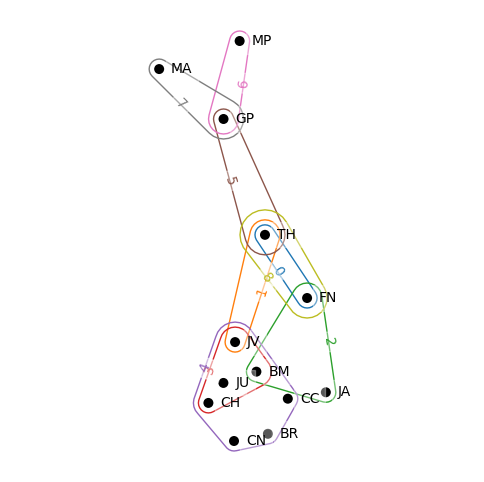

In [44]:
np.random.seed(1)
plt.subplots(figsize=(6,6))
hnx.draw(H)

In [47]:
# Optional parameter s is not shown, defaults to s=1
H.distance('MA', 'FN', s = 2)

inf

In [48]:
# Optional parameter s is not shown, defaults to s=1
H.edge_distance(4, 6)

3

If the edges or nodes are not $s$-connected then the $s$-distance displays a warning and returns `inf`.

In [ ]:
H.edge_distance(4, 6, s=2)

inf

The $s$-diameter (`diameter`) is the longest s-distance between any two nodes and the $s$-edge diameter (`edge_diameter`) is the longest s-distance between any two edges.

In [52]:
# Optional parameter s is not shown, default is s=1

H.diameter(s=1), H.edge_diameter()

(4, 3)

Below is a drawing of the hypergraph to help confirm the outputs:

<img src='https://github.com/pnnl/HyperNetX/blob/master/tutorials/images/tutorial_1_hypergraph.png?raw=1' width='500px' style="float:left;margin-right:10pt"></img>

If the hypergraph is not $s$-connected then the diameter methods throw a `HyperNetXError`.

In [ ]:
# ## Uncomment this cell to test the error message
# H.diameter(s=2)

If your hypergraph is not s-connected but you want to explore the s-diameters of all of the s-connected components (edge or node), use `node_diameters` and `edge_diameters`. These methods return a tuple where the first element is the maximum diameter over all s-components, the second element is the list of all s-diameters, and the third is the list of the s-components (edges or nodes).

In [53]:
H.node_diameters(s=2)

(1,
 [1, 0, 0, 0, 1, 0, 0, 0, 0],
 [{'BM', 'CH', 'JU', 'JV'},
  {'BR'},
  {'CC'},
  {'CN'},
  {'FN', 'TH'},
  {'GP'},
  {'JA'},
  {'MA'},
  {'MP'}])

In [54]:
H.edge_diameters(s=2)

(1,
 [1, 0, 0, 1, 0, 0, 0],
 [{np.int64(0), np.int64(8)},
  {np.int64(1)},
  {np.int64(2)},
  {np.int64(3), np.int64(4)},
  {np.int64(5)},
  {np.int64(6)},
  {np.int64(7)}])

# Collapsing nodes and edges
Sometimes a set of nodes are in the exact same set of edges, or more than one edge encloses the exact same set of nodes. We call these duplicate nodes and duplicate edges. We group the duplicates into equivalence classes and choose one node or edge from each class as a representative. The collection of nodes and edges in the same class are replaced by the single representative of the class, making the hypergraph less noisy. Use the methods `collapse_nodes`, `collapse_edges`, and `collapse_nodes_and_edges`.

There are some parameters that can be used:
* use_uids = list : allows you to choose which representatives you want to use for the classes
* use_counts = True/False : If True then number of elements in each equivalence class will be added to the name of each representative.
* return_counts = True/False : If True and the count is added to the properties of the representative.
* return_equivalence_classes : returns a dictionary of equivalence classes along with the hypergraph.


In [55]:
H_node_collapse_counts,eclass_counts = H.collapse_nodes(use_counts=True, return_equivalence_classes=True)
eclass_counts

{'BM:1': ['BM'],
 'BR:3': ['BR', 'CC', 'CN'],
 'CH:2': ['CH', 'JU'],
 'FN:1': ['FN'],
 'GP:1': ['GP'],
 'JA:1': ['JA'],
 'JV:1': ['JV'],
 'MA:1': ['MA'],
 'MP:1': ['MP'],
 'TH:1': ['TH']}

In [57]:
H_node_collapse,eclasses = H.collapse_nodes(use_counts=False, return_equivalence_classes=True)
eclasses

{'BM': ['BM'],
 'BR': ['BR', 'CC', 'CN'],
 'CH': ['CH', 'JU'],
 'FN': ['FN'],
 'GP': ['GP'],
 'JA': ['JA'],
 'JV': ['JV'],
 'MA': ['MA'],
 'MP': ['MP'],
 'TH': ['TH']}

If use_counts == True, the collapsed nodes will be enlarged according to the size of the equivalence class

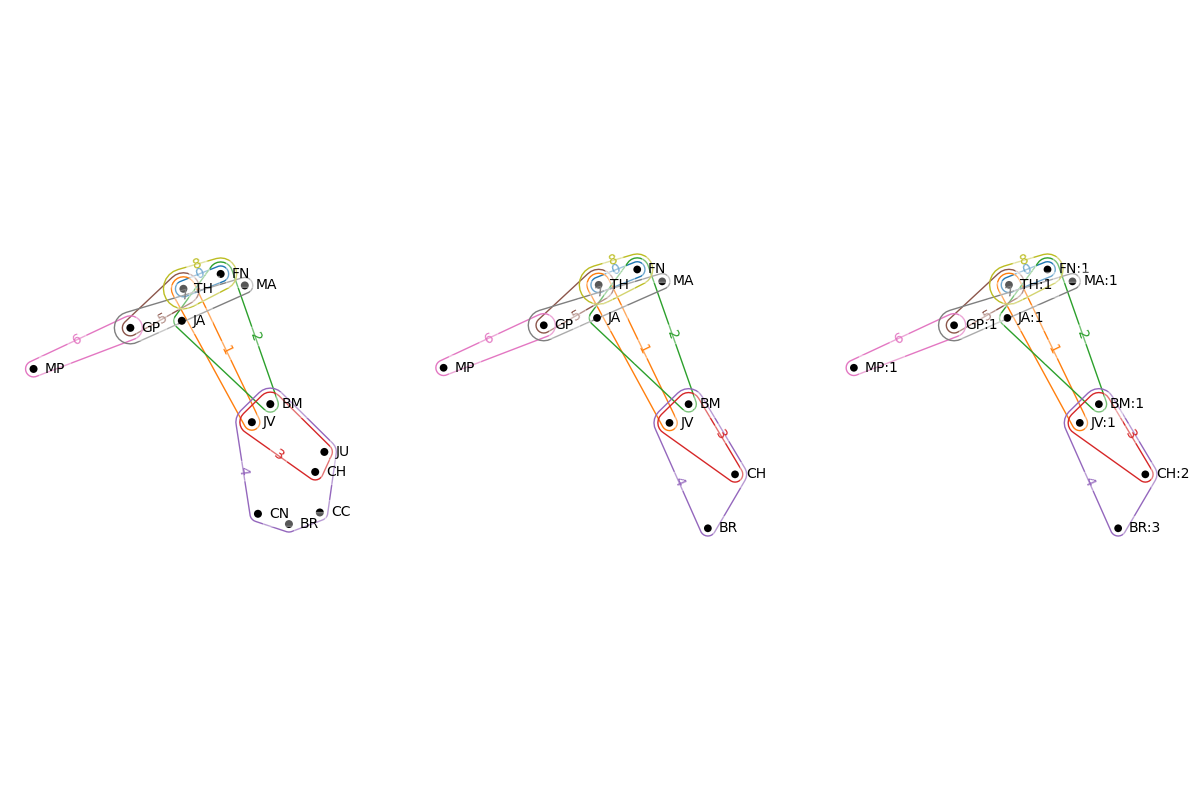

In [58]:
fig,ax = plt.subplots(1,3,figsize=(15,10))

pos = hnx.draw(H,ax=ax[0],return_pos=True)
pose = {nd:pos[nd.split(":")[0]] for nd in H_node_collapse_counts}

hnx.draw(H_node_collapse,ax=ax[1],pos=pos)
hnx.draw(H_node_collapse_counts, ax=ax[2],pos=pose) ## note the node size reflects the counts

In [59]:
HD_edge_collapse = HD.collapse_edges()

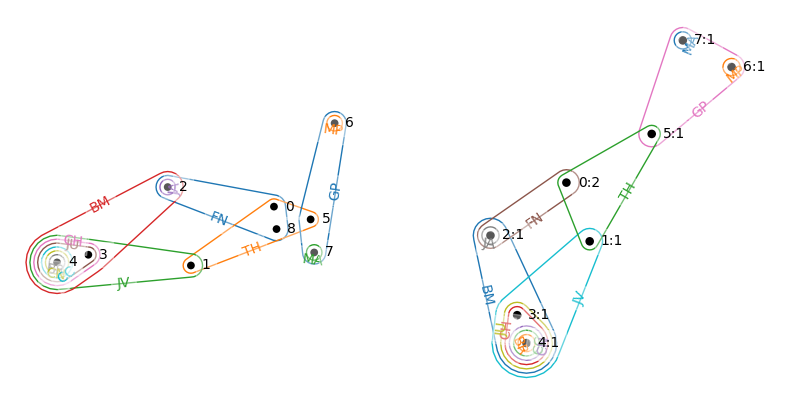

In [63]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
hnx.draw(HD,ax=ax[0])
hnx.draw(HD.collapse_nodes(use_counts=True),ax=ax[1])
# hnx.draw(HD_edge_collapse, with_edge_counts=True)

`collapse_nodes_and_edges` simply runs both of the above collapsing commands.

# Updating the Hypergraph


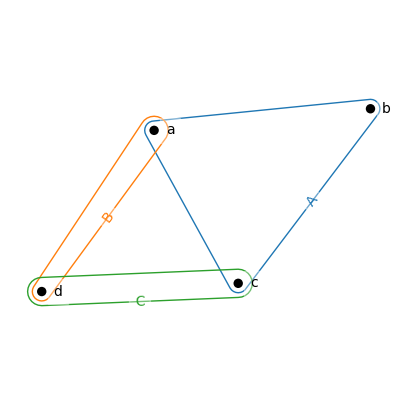

In [64]:
np_array = np.array([['A','a'],['A','b'],['A','c'],['B','a'],['B','d'],['C','c'],['C','d']])

H = hnx.Hypergraph(np_array)

plt.subplots(figsize=(5,5))
hnx.draw(H)

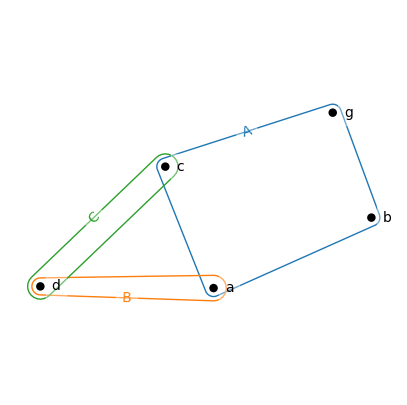

In [65]:
H.add_incidence('A','g')
plt.subplots(figsize=(5,5))
hnx.draw(H)

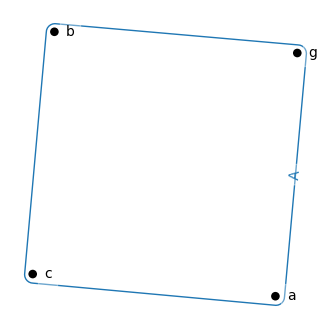

In [66]:
plt.subplots(figsize=(4,4))
hnx.draw(H.remove_edges(['B','C']))


# Building sub-hypergraphs
There are two methods that can be used to look at different kinds of sub-hypergraphs: `restrict_to_nodes` and `restrict_to_edges`. The method, `restrict_to_nodes`, builds a sub-hypergraph from a specific subset of nodes and all edges that they are included in. The method, `restict_to_edges`, builds a sub-hypergraph from a subset of edges and all nodes contained in the edges.

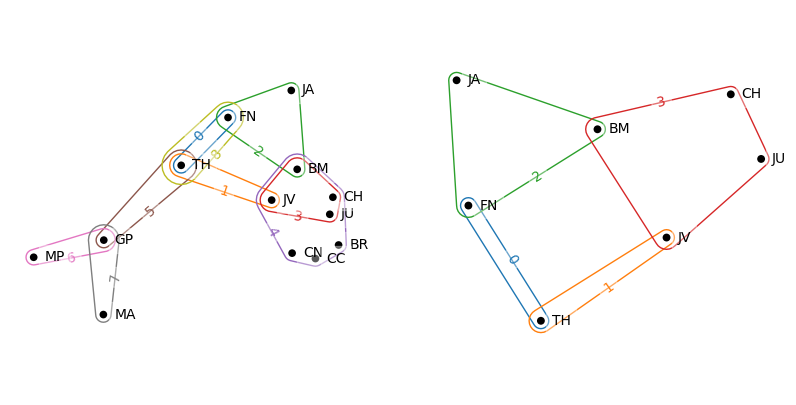

In [67]:
scenes_dictionary = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP'),
    8: ('FN', 'TH')
}

H = hnx.Hypergraph(scenes_dictionary)

fig,ax = plt.subplots(1,2,figsize=(10,5))
hnx.draw(H,ax=ax[0])
hnx.draw(H.restrict_to_edges([0, 1, 2, 3]),ax=ax[1])

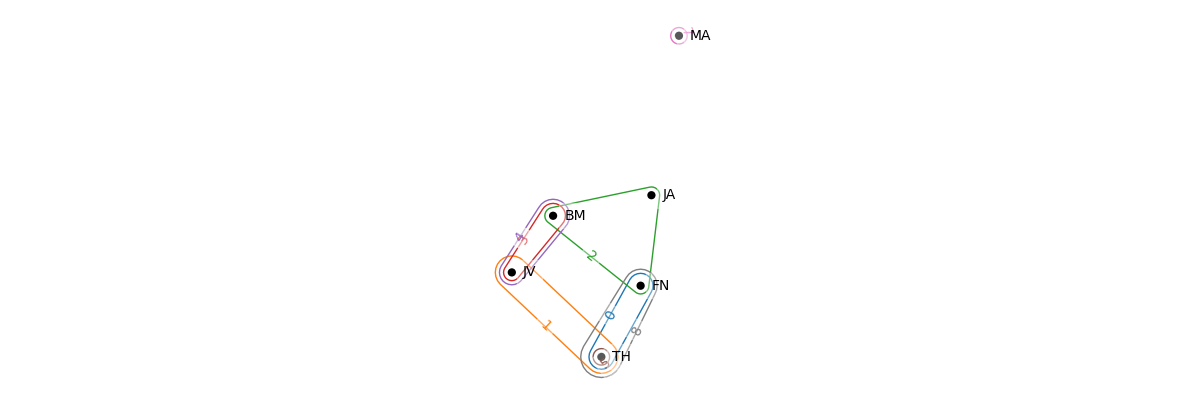

In [68]:
plt.subplots(figsize=(15,5))
H_restrict_nodes = H.restrict_to_nodes(['JA', 'FN', 'JV', 'MA', 'BM', 'TH'])
hnx.draw(H_restrict_nodes)

In [69]:
H_restrict_nodes.incidence_dict

{0: ['FN', 'TH'],
 1: ['TH', 'JV'],
 2: ['BM', 'FN', 'JA'],
 3: ['JV', 'BM'],
 4: ['JV', 'BM'],
 5: ['TH'],
 7: ['MA'],
 8: ['FN', 'TH']}

When hypergraphs are very large and disconnected, often it is beneficial to isolate those components made of a single node and a single edge.
As in the above example we identify these **singleton** components using the `singletons` method and remove them with the `remove_singletons` method.

In [70]:
H_restrict_nodes.singletons()

[np.int64(7)]

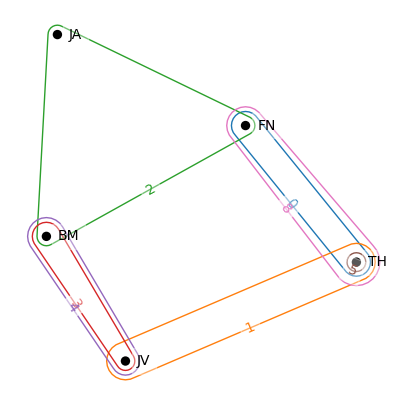

In [73]:
plt.subplots(figsize=(5,5))
H2 = H_restrict_nodes_remove_singletons = H_restrict_nodes.remove_singletons()
pos = hnx.draw(H2,return_pos=True)

Finally, sometimes we care only about top level hyperedges that are not contained in any other hyperedge, although they may intersect others. These top level hyperedges are called "toplexes" and can be found using the `toplexes` method, which returns a new hypergraph consisting only of the toplex hyperedges, note the toplex hypergraph we obtain need not be uniquely defined.

The `toplexes` method on the above hypergraph removes 3 hyperedges. While HNX will pretty consistently remove the same two edges,the hypergraph gotten by restricting to a single set of toplexes is not unique.

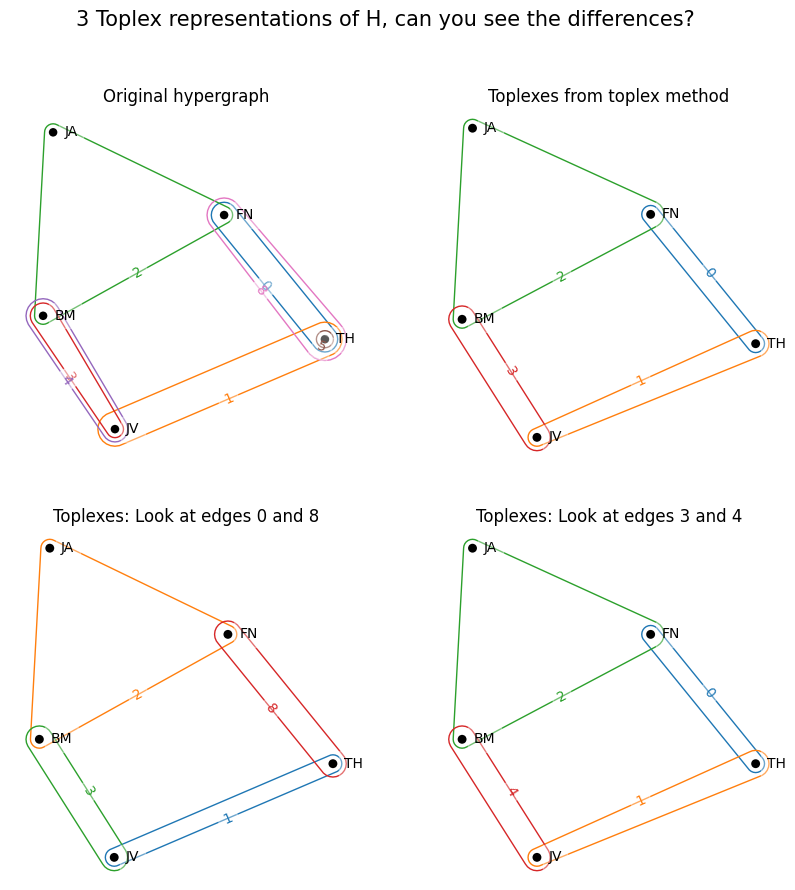

In [74]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
hnx.draw(H2,ax=ax[0,0],pos=pos)
ax[0,0].set_title('Original hypergraph')

hnx.draw(H2.toplexes(return_hyp=True),ax=ax[0,1],pos=pos)
ax[0,1].set_title('Toplexes from toplex method')

## remove different toplex edges to get new toplex representations of the hypergraph
hnx.draw(H2.remove_edges([4,5,0],inplace=False),ax=ax[1,0],pos=pos)
ax[1,0].set_title('Toplexes: Look at edges 0 and 8')

hnx.draw(H2.remove_edges([3,5,8],inplace=False),ax=ax[1,1],pos=pos)
ax[1,1].set_title('Toplexes: Look at edges 3 and 4')

fig.suptitle('3 Toplex representations of H, can you see the differences?',fontsize=15);